In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df1=pd.read_csv("/content/drive/MyDrive/Predicting yield of bajara in Visakhapatnam.csv")
df1

,Unnamed: 0,Crop_Year,Crop,Area,Production,JUN,JUL,AUG,SEP,mansoon
0,0,1997,0,17700,9700,63.1,156.0,128.1,315.5,662.7
1,1,1998,0,25000,28700,136.2,214.1,252.2,255.5,858.0
2,2,1999,0,18351,16956,126.4,154.2,136.6,137.5,554.7
3,3,2000,0,17746,19663,200.5,154.1,311.5,102.9,768.9
4,4,2001,0,15686,13019,117.2,123.0,170.7,187.2,598.1
5,5,2002,0,14123,8897,115.2,74.7,173.5,71.7,435.0
6,6,2003,0,17771,20312,104.0,241.7,158.3,130.2,634.1
7,7,2004,0,12458,13093,152.8,192.1,125.0,101.7,571.5
8,8,2005,0,8319,4634,88.1,151.5,105.9,398.1,743.6
9,9,2006,0,8197,7525,132.0,126.8,279.7,224.1,762.6


In [ ]:
df2=df1.drop(['Unnamed: 0'],axis='columns')
df2

,Crop_Year,Crop,Area,Production,JUN,JUL,AUG,SEP,mansoon
0,1997,0,17700,9700,63.1,156.0,128.1,315.5,662.7
1,1998,0,25000,28700,136.2,214.1,252.2,255.5,858.0
2,1999,0,18351,16956,126.4,154.2,136.6,137.5,554.7
3,2000,0,17746,19663,200.5,154.1,311.5,102.9,768.9
4,2001,0,15686,13019,117.2,123.0,170.7,187.2,598.1
5,2002,0,14123,8897,115.2,74.7,173.5,71.7,435.0
6,2003,0,17771,20312,104.0,241.7,158.3,130.2,634.1
7,2004,0,12458,13093,152.8,192.1,125.0,101.7,571.5
8,2005,0,8319,4634,88.1,151.5,105.9,398.1,743.6
9,2006,0,8197,7525,132.0,126.8,279.7,224.1,762.6


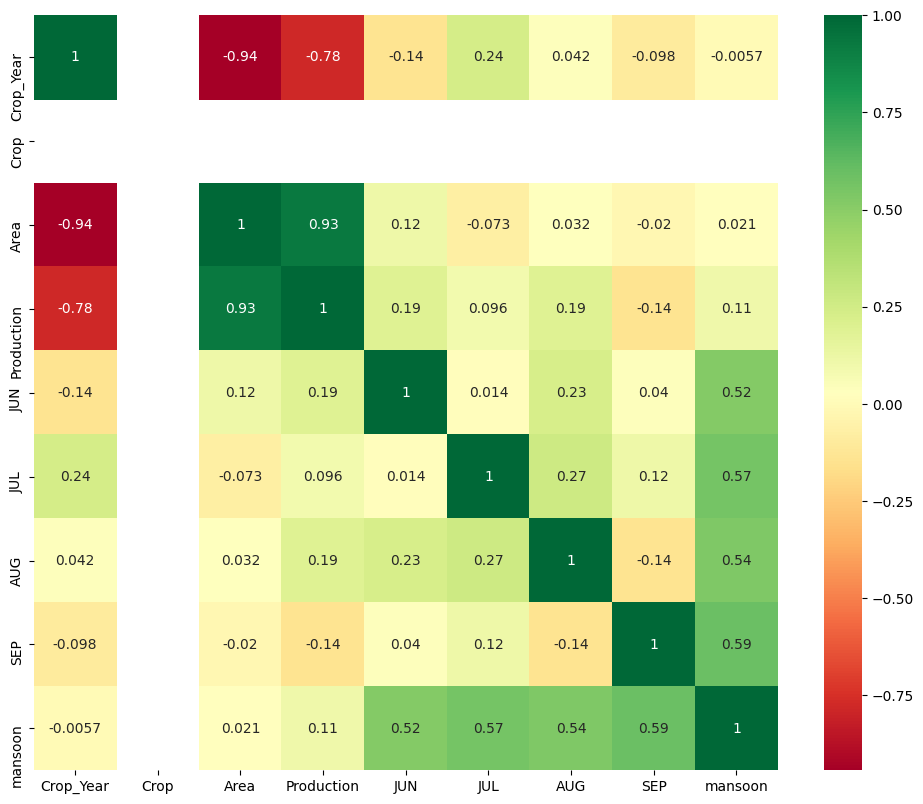

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
cor = df2.corr()
plt.figure(figsize = (12,10))

top_corr_features=cor.index
g=sns.heatmap(df2[top_corr_features].corr(), annot=True, cmap ="RdYlGn")

In [ ]:
df3=df2.drop(['Crop','JUL','SEP'],axis='columns')
df3

,Crop_Year,Area,Production,JUN,AUG,mansoon
0,1997,17700,9700,63.1,128.1,662.7
1,1998,25000,28700,136.2,252.2,858.0
2,1999,18351,16956,126.4,136.6,554.7
3,2000,17746,19663,200.5,311.5,768.9
4,2001,15686,13019,117.2,170.7,598.1
5,2002,14123,8897,115.2,173.5,435.0
6,2003,17771,20312,104.0,158.3,634.1
7,2004,12458,13093,152.8,125.0,571.5
8,2005,8319,4634,88.1,105.9,743.6
9,2006,8197,7525,132.0,279.7,762.6


In [ ]:
# Features that are most important in determining yield of bajra in Visakhapatnam
R=df3.drop(['Production'],axis='columns')
s=df3[['Production']]
# from sklearn.model_selection import train_test_split
# R_train,R_test,s_train,s_test=train_test_split(R,s,test_size=0.2)

In [ ]:
from sklearn.linear_model import LinearRegression
bal=LinearRegression()
bal.fit(R,s)
LR=bal.score(R,s)
print(bal.score(R,s))
prebal=bal.predict(R)
print(prebal)
df4=pd.DataFrame(prebal,columns=['prebal'])
df4

0.955063730462656
[[11792.46551073]
 [28336.16736003]
 [16204.02271195]
 [18841.69416335]
 [13723.05104446]
 [12149.87897751]
 [19372.00925608]
 [11076.35914139]
 [ 3350.23501766]
 [ 6695.5069773 ]
 [ 6334.95193137]
 [ 5179.15974563]
 [ 2023.05610261]
 [ 6748.54736034]
 [ 4507.30924041]
 [ 4678.21651362]
 [ 3613.82137862]
 [ 2853.54756695]]


,prebal
0,11792.465511
1,28336.167360
2,16204.022712
3,18841.694163
4,13723.051044
5,12149.878978
6,19372.009256
7,11076.359141
8,3350.235018
9,6695.506977


In [ ]:
from sklearn.svm import SVR
# from sklearn.model_selection import cross_val_score
bas=SVR(C=40,gamma="scale",kernel='linear')
# cross_val_score(bas,R,s,cv=3)
bas.fit(R,s)
SV=bas.score(R,s)
print(bas.score(R,s))
prebas=bas.predict(R)
print(prebas)
df5=pd.DataFrame(prebas,columns=['svr'])
df5

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.919958136282711
[14870.13317252 28168.36042596 17971.14100481 20434.34360982
 15376.68326737 14205.51407744 18977.90291978 11799.98959137
  4642.64935196  8227.63920857  6157.46683789  6211.53421463
  3118.72248674  5969.26764454  4484.92430831  3849.56968666
  2478.86497731  2057.10330362]


,svr
0,14870.133173
1,28168.360426
2,17971.141005
3,20434.343610
4,15376.683267
5,14205.514077
6,18977.902920
7,11799.989591
8,4642.649352
9,8227.639209


In [ ]:
from sklearn.neighbors import KNeighborsRegressor 
bak= KNeighborsRegressor(n_neighbors=2, metric='minkowski', p=2)  
bak.fit(R, s)

KNN=bak.score(R,s)

print(bak.score(R,s))
knbak= bak.predict(R)
print(knbak)
df6=pd.DataFrame(knbak,columns=['knn'])
df6

0.8790253638716257
[[15006. ]
 [22828. ]
 [18634. ]
 [19987.5]
 [10958. ]
 [10958. ]
 [15006. ]
 [10995. ]
 [ 6079.5]
 [ 6079.5]
 [ 5552.5]
 [ 5156. ]
 [ 5229.5]
 [ 5156. ]
 [ 5229.5]
 [ 4464.5]
 [ 2180. ]
 [ 2180. ]]


,knn
0,15006.0
1,22828.0
2,18634.0
3,19987.5
4,10958.0
5,10958.0
6,15006.0
7,10995.0
8,6079.5
9,6079.5


In [ ]:
from sklearn.ensemble import RandomForestRegressor
ran=RandomForestRegressor(n_estimators=80,max_depth=3)
ran.fit(R, s)
RAN=ran.score(R,s)
preran=ran.predict(R)
print(ran.score(R,s))
print(preran)
df7=pd.DataFrame(preran,columns=['random'])
df7

0.9586247337755102
[13097.50979167 25703.93229167 18412.11833333 20616.13708333
 12068.02583333 10207.88979167 18597.17041667 11674.67584867
  6372.77437049  6371.41915675  5874.72184073  5469.01292704
  4983.46486156  5747.3116324   4936.7060074   4468.22026831
  3211.94859172  2933.87324946]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


,random
0,13097.509792
1,25703.932292
2,18412.118333
3,20616.137083
4,12068.025833
5,10207.889792
6,18597.170417
7,11674.675849
8,6372.774370
9,6371.419157


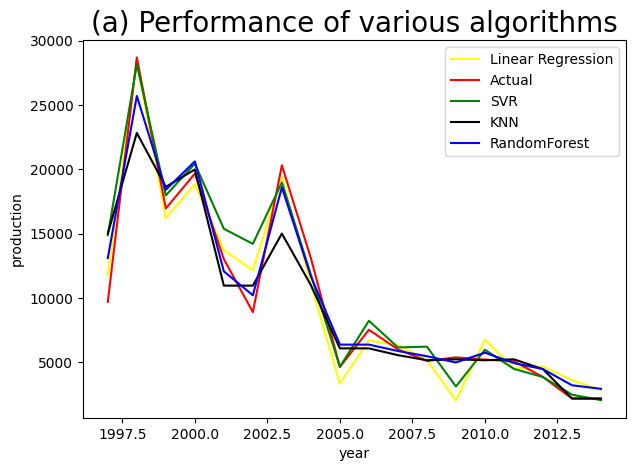

In [ ]:
import matplotlib.pyplot as plt
m=df4['prebal']
n=df2['Production']
o=df5['svr']
p=df6['knn']
q=df7['random']
x=df2['Crop_Year']
plt.plot(x,m,label="Linear Regression",color='yellow',marker="")
plt.plot(x,n,label="Actual",color='red',marker="")
plt.plot(x,o,label="SVR",color='green',marker="")
plt.plot(x,p,label="KNN",color='black',marker="")
plt.plot(x,q,label="RandomForest",color='blue',marker="")
# plt.xlim(0,20)
# plt.ylim(0,30000,5000)
# plt.axis([0,20,0,30000])
plt.xlabel("year")
plt.ylabel("production")
plt.title("(a) Performance of various algorithms",fontsize=20)
plt.legend()
plt.savefig("Performance of various algorithms.jpg")
plt.show()

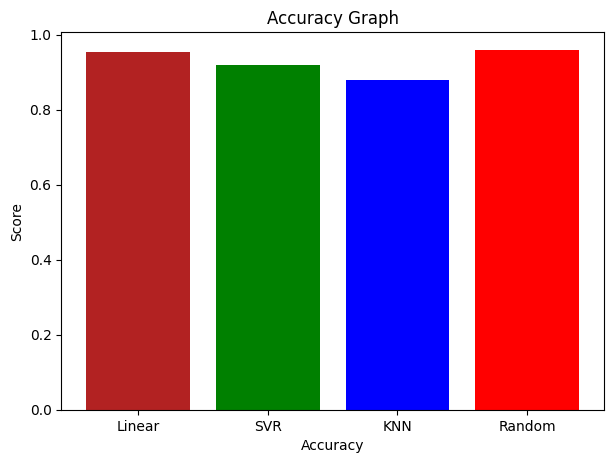

In [ ]:

import matplotlib.pyplot as plt

plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})


A = ['Linear','SVR','KNN','Random']

B = [LR,SV,KNN,RAN]


# #bar plot

plt.bar(A,B,color=['firebrick', 'green', 'blue', 'red'])



# #add title
plt.title('Accuracy Graph')

# #add x and y labels
plt.xlabel('Accuracy')
plt.ylabel('Score')

# #show plot
plt.show()

In [ ]:
print(ran.predict([[2015,2395,45.7,177.8,519.7]]))

[2933.87324946]


In [ ]:
print(ran.predict([[2016,24000,130.5,123.1,545.0]]))

[18416.53489583]


In [ ]:
print(ran.predict([[2017,2395,45.7,177.8,519.7]]))

[2933.87324946]


In [ ]:
print(ran.predict([[2018,1900,39.8,60.8,445.4]]))

[3033.90025839]


In [ ]:
df8=pd.concat([df3.Crop_Year,df7],axis=1)
df8

,Crop_Year,random
0,1997,13097.509792
1,1998,25703.932292
2,1999,18412.118333
3,2000,20616.137083
4,2001,12068.025833
5,2002,10207.889792
6,2003,18597.170417
7,2004,11674.675849
8,2005,6372.774370
9,2006,6371.419157


In [ ]:
df9= pd.DataFrame(df8) 
   
  
df9.loc[len(df9.index)] = [2015,2843.52467713] 
  
df9.loc[len(df9.index)] = [2016,2960.92019796] 
df9.loc[len(df9.index)] = [2017,2843.52467713] 
df9.loc[len(df9.index)] = [2018,2962.10270743]

df9

,Crop_Year,random
0,1997.0,13097.509792
1,1998.0,25703.932292
2,1999.0,18412.118333
3,2000.0,20616.137083
4,2001.0,12068.025833
5,2002.0,10207.889792
6,2003.0,18597.170417
7,2004.0,11674.675849
8,2005.0,6372.774370
9,2006.0,6371.419157


In [ ]:
df10=df3.drop(['Crop_Year','mansoon'],axis=1)
df10

,Area,Production,JUN,AUG
0,17700,9700,63.1,128.1
1,25000,28700,136.2,252.2
2,18351,16956,126.4,136.6
3,17746,19663,200.5,311.5
4,15686,13019,117.2,170.7
5,14123,8897,115.2,173.5
6,17771,20312,104.0,158.3
7,12458,13093,152.8,125.0
8,8319,4634,88.1,105.9
9,8197,7525,132.0,279.7


In [ ]:
df11=pd.concat([df9,df10],axis=1)
df11

,Crop_Year,random,Area,Production,JUN,AUG
0,1997.0,13691.106815,17700.0,9700.0,63.1,128.1
1,1998.0,24721.879167,25000.0,28700.0,136.2,252.2
2,1999.0,19056.488690,18351.0,16956.0,126.4,136.6
3,2000.0,20034.802232,17746.0,19663.0,200.5,311.5
4,2001.0,12115.684628,15686.0,13019.0,117.2,170.7
5,2002.0,10364.733795,14123.0,8897.0,115.2,173.5
6,2003.0,19226.898065,17771.0,20312.0,104.0,158.3
7,2004.0,12154.411592,12458.0,13093.0,152.8,125.0
8,2005.0,6256.182949,8319.0,4634.0,88.1,105.9
9,2006.0,6338.351892,8197.0,7525.0,132.0,279.7


In [ ]:
df11.interpolate()

,Crop_Year,random,Area,Production,JUN,AUG
0,1997.0,13691.106815,17700.0,9700.0,63.1,128.1
1,1998.0,24721.879167,25000.0,28700.0,136.2,252.2
2,1999.0,19056.488690,18351.0,16956.0,126.4,136.6
3,2000.0,20034.802232,17746.0,19663.0,200.5,311.5
4,2001.0,12115.684628,15686.0,13019.0,117.2,170.7
5,2002.0,10364.733795,14123.0,8897.0,115.2,173.5
6,2003.0,19226.898065,17771.0,20312.0,104.0,158.3
7,2004.0,12154.411592,12458.0,13093.0,152.8,125.0
8,2005.0,6256.182949,8319.0,4634.0,88.1,105.9
9,2006.0,6338.351892,8197.0,7525.0,132.0,279.7


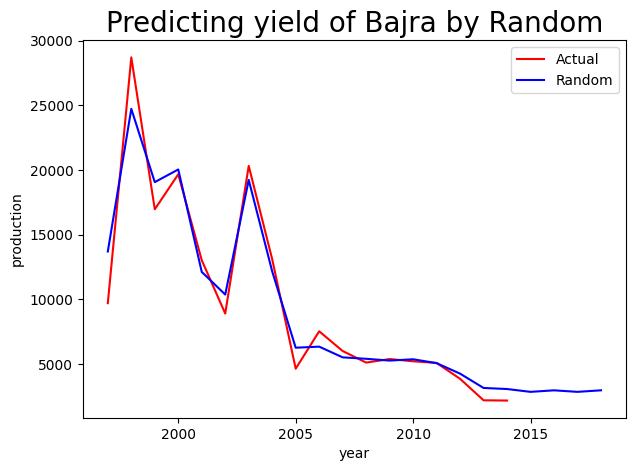

In [ ]:
import matplotlib.pyplot as plt
n=df11['Production']
o=df11['random']
x=df11['Crop_Year']
plt.plot(x,n,label="Actual",color='red',marker="")
plt.plot(x,o,label="Random",color='blue',marker="")
plt.xlabel("year")
plt.ylabel("production")
plt.title("Predicting yield of Bajra by Random",fontsize=20)
plt.legend()
# plt.savefig("Predicting yield of Bajra by random.jpg")
plt.show()